In [1]:
# import necessary libraries
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# FROM PS6
def drawGz(G,z):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    # map node labels to colors (for the visualization)
    colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc', '#000000'] 
    
    node_colors = []
    for i in G.nodes():
        node_colors.append(colors[int(z[i])])
    nsize  = 600
    flabel = True

    if G.order() > 50:
        nsize  = 100
        flabel = False
        
    nx.draw_networkx(G,with_labels=flabel,node_size=nsize,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 

    return

def tabulate_wk(G,z,c):
    # This function tabulates the w_rs and kappa_r auxiliary data structures for the DC-SBM
    #
    # input  : G is simple graph with n nodes
    #        : z is a dictionary of group labels for G's nodes, into c groups
    #        : c is scalar, number of possible groups
    # output : wrs, kpr
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted
    
    wrs = np.zeros([c,c]) # count of stubs from group r to group s
    kpr = np.zeros([c,1]) # total degree of group r

    ##### do not modify above here #####

    
    ### YOUR CODE
    
    # calucate wrs
    edges = list(G.edges())
    for e in edges:
        r = z[int(e[0])]
        s = z[int(e[1])]
        wrs[r,s] = wrs[r,s] + 1
        wrs[s,r] = wrs[s,r] + 1
        
    kpr = np.sum(wrs, axis = 1)
#     for i in range(c): # loop through each group
#         for j in range(c):
#             for e in list(G.edges()):
#                 if ((z[e[0]] == i and z[e[1]] == j)):
#                     wrs[i][j] += 1 
#                     wrs[j][i] += 1 # account for both direction        

        
#     # Calculate total degree of group r
#     for i in range(c):
#         kpr[i] = sum(wrs[i])
        
    ##### do not modify below here #####

    return wrs,kpr

def random_z(n,c):
    # input  : number of nodes n, and number of groups c
    # output : returns a random partition in a dictionary z, where z_i = Uniform(0,c-1)

    import random as rnd
    rnd.seed()
    
    z = dict()

    ##### do not modify above here #####

    
    ### YOUR CODE
    for i in range(n):
        z[i] = int(rnd.randint(0, c - 1))

    ##### do not modify below here #####

    return z

def dcsbm_LogL(wrs,kpr):
    # DO NOT MODIFY THIS FUNCTION
    # This function calculates the log-likelihood of the degree-corrected stochastic block model (DC-SBM)
    # See Eq. (9) in Lecture 6.
    #
    # input  : wrs is a c x c np.array of stub counts
    #        : kpr is a c x 1 np.array of stub counts 
    # output : the dcsbm log-likelihood
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    c = wrs.shape[1]  # number of groups
    
    logL = 0
    for r in range(c):
        for s in range(c):
            if wrs[r,s] < 1 or kpr[r] < 1 or kpr[s] < 1:
                temp = 0 # define 0^0 = 1
            else:
                temp = wrs[r,s]*np.log( wrs[r,s] / (kpr[r]*kpr[s]) )
            logL = logL + temp
    
    return logL
    # DO NOT MODIFY THIS FUNCTION

    
def plotLL(LL,pc,n):
    # DO NOT MODIFY THIS FUNCTION
    # This function makes a nice plot of the log-likelihood trajectory
    #
    # input  : LL is list of log-likelihood values of length (n+1)*(pc+1)
    #        : n, number of nodes
    #        : pc, number of phases in LL
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    tc  = len(LL)               # number of partitions considered in the LL trajectory

    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    
    plt.plot(range(tc), LL, 'b.-', alpha=0.5)  # plot the log-likelihood trajectory
    for i in range(pc):                        # add vertical bars to demarcate phases, add black squares for phase-maxima
        plt.plot([(i)*(n+1),(i)*(n+1)],[min(LL),max(LL)], 'k--', alpha=0.5) # vertical bar
        LLp = LL[(i)*(n+1):(i+1)*(n+1)]
        b = LLp.index(max(LLp))
        plt.plot([(i)*(n+1)+b],[max(LLp)], 'ks', alpha=0.5)

    plt.ylabel('log-likelihood, DC-SBM')
    plt.xlabel('number of partitions considered')
    plt.show()
    
def makeAMove(G,z,c,f):
    # For each non 'frozen' node in the current partition, this function tries all (c-1) possible group moves for it
    # It returns the combination of [node i and new group r] that produces the best log-likelihood over the non-frozen set
    # input  : G, a graph
    #        : z, a partition of G's nodes
    #        : c, the number of groups
    #        : f, a binary labeling of frozen nodes
    # output : bestL, the best log-likelihood found
    #        : bestMove, [i,r] the node i and new group r to achieve bestL
    
    bestL = -np.inf            # the best log-likelihood over all considered moves
    for i in G.nodes():        # loop over all nodes i
        if f[i] == 0:          # if i is not frozen
            s = int(z[i])      #  get current label of i
            for r in range(c): #  then loop over all groups r
                
                
                ##### do not modify above here #####

                
                ## YOUR CODE
                if r != s: # only look moving to a new group
#                     # get new dict for new partition
#                     z_new = copy.deepcopy(z)
#                     z_new[i] = r
                    z[i] = int(r)
                    
                    # calculate new wrs and new kpr
                    wrs,kpr = tabulate_wk(G,z,c)
                    
                    # calculate likelihood
                    thisL = dcsbm_LogL(wrs, kpr)
                    
                    #print(f'v[{i}] s = {s}, r={r}, {r!=s}') # for debugging
                    
                    # update move if best move
                    if thisL > bestL:
                        bestL = thisL
                        bestMove = [i,r]
                    
                    z[i] = int(s) # move node back
    
                
                
                ##### do not modify below here #####    
                
    return bestL,bestMove

def run_OnePhase(G,z0,c):
    # Runs one phase, initialized from partition z0
    # Returns the best partition found in the phase and the list of LogL values for all the phase's partitions
    # input  : G, a graph
    #        : z0, initial partition of G's nodes
    #        : c, the number of groups
    # output : zstar, the best partition of the phase
    #        : Lstar, the LogL of zstar
    #        : LL, the inorder list of LogL values for the n+1 partitions of this phase
    #        : halt, 1 if zstar=z0 (no better partition found)

    import copy      # for copy.deepcopy() function
    n    = G.order() # n, number of nodes
    LL   = []        # stores log-likelihoods over the entire algorithm (via .append)
    halt = 0         # flag: =0 if Lstar > L0 at the end of the phase; =1 if Lstar <= L0

    # initialize the phase
    wrs,kpr = tabulate_wk(G,z0,c)      # wrs, kpr, initial DC-SBM parameters
    L0      = dcsbm_LogL(wrs,kpr)      # store initial DC-SBM log-likelihood
    LL.append(L0)                      # track log-likelihood

    f     = dict.fromkeys(range(n), 0) # initially, all nodes unfrozen (tricky python)
    t     = 0                          # number of frozen nodes in this phase
    Lstar = L0                         # initially, z0 has the best LogL
    zstar = copy.deepcopy(z0)          # and z0 is the best partition
    tstar = t                          # tstar = 0

    # loop over all the nodes in G, making greedy move for each
    zt = copy.deepcopy(z0) # start the loop at z0
#     maxL = -np.inf
#     bestChoice = None
    #halt = 1
    for j in range(n):
        #print(f'step {j}') # for debugging

        ##### do not modify above here #####

        
        ### YOUR CODE
        choiceL, choiceMove = makeAMove(G,zt,c,f)
        #print(f'choiceL    = {choiceL}\nchoiceMove = node {choiceMove[0]} --> group {choiceMove[1]}')
        
        i, r = choiceMove
        f[i] = 1 # freeze node
        t = t + 1
        LL.append(choiceL)
        zt[i] = r
        
        
        
        # if move is better than Lstar
        if choiceL > Lstar:
            zstar = copy.deepcopy(zt)
            Lstar = choiceL
            tstar = t
    
        
    if tstar == 0:
        halt = 1
        
    return zstar,Lstar,LL,halt

def fit_DCSBM(G,c,T):
    # Runs the full locally greedy heuristic, with c groups
    # Returns the best partition found, its LogL, and the list of LogL values for all partitions considered
    # input  : G, a graph
    #        : c, the number of groups
    #        : T, the number maximum number of phases allowed
    # output : zstar, the best partition of the phase
    #        : Lstar, the LogL of zstar
    #        : LL, the inorder list of all LogL values considered
    #        : pc, the number of phases in LL

    import copy # for copy.deepcopy()
    
    # 1.0 locally greedy heuristic setup
    n  = G.order() # n, number of nodes
    LL   = []      # log-likelihoods over the entire algorithm (concat via .extend)
    halt = 0       # convergence flag

    # 2.0 generate initial partition, calculate wrs,kpr, and store the loglikelihood in Lt
    zt      = random_z(n,c)       # z0, initial partition
    #zt = {i: 0 for i in G.nodes()}
    wrs,kpr = tabulate_wk(G,zt,c) # wrs, kpr, initial DC-SBM parameters
    Lt      = dcsbm_LogL(wrs,kpr) # store initial DC-SBM log-likelihood

    # 3.0 the main loop
    pc = 0  # counter for number of phases completed
    
    while not halt:
        # 3.1 visualization of this phase's initial partition
        # print(f'phase[{pc}] z[0], logL = {Lt}')
        # drawGz(G,zt)

        ##### do not modify above here #####

        
        ### YOUR CODE
        zstar, lstar, phaseLL, halt = run_OnePhase(G, zt, c)
        LL.extend(phaseLL)
        zt = copy.deepcopy(zstar)
        Lt = lstar
        if pc >= T:
            halt = 1
        else: pc = pc + 1
        
#         if pc <= T:
#             z, l, LL_list, halt = run_OnePhase(G,zt,c)
#             LL.extend(LL_list)
#             zt = copy.deepcopy(z)
        
#         else: 
#             halt = 1
            
#         pc += 1

        
#     Lstar = max(LL)
#     zstar = copy.deepcopy(zt)


        ##### do not modify below here #####
    
    print(f' --> WE HAVE CONVERGENCE <-- ') # a friendly alert
    return zstar,Lt,LL,pc

(6387, 186)
393
232


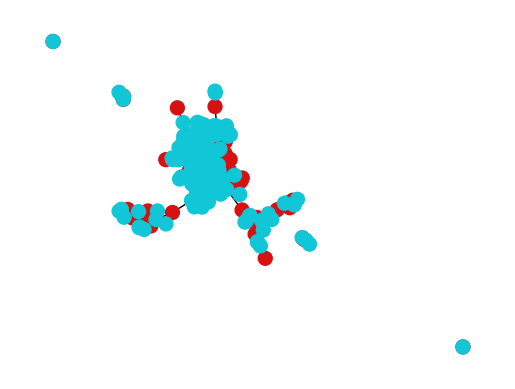

In [4]:
# CONVERT CSV OF ESVs and SAMPLEs to BIPARTITE GRAPH

#  Read the CSV files using pandas
esv_to_sample = pd.read_csv('esv_to_sample.csv', index_col=0) 
sample_mapping = pd.read_csv('sample_mapping.csv', index_col=0)
esv_taxonomy = pd.read_csv('esv_taxonomy.csv', index_col=0)

print(esv_to_sample.shape)

# keeping only top 300 ESVs
esv_to_sample['row_sums'] = esv_to_sample.sum(axis=1)
esv_to_sample = esv_to_sample.nlargest(300, 'row_sums')

# Remove the added column 'row_sums'
esv_to_sample.drop(columns=['row_sums'], inplace=True)

# Remove columns that sum to 0
zero_sum_columns = esv_to_sample.columns[esv_to_sample.sum() == 0]
esv_to_sample = esv_to_sample.drop(zero_sum_columns, axis=1)

# Create a bipartite graph object in NetworkX  
G = nx.Graph()

# Add sample nodes
for i in range(len(esv_to_sample.columns)):
    sample_id = esv_to_sample.columns[i]
    location_name = sample_mapping.loc[sample_id, 'Location']
    G.add_node(i, bipartite='Sample', name=sample_id, location=location_name)
    
# Add esv nodes
for i, esv_id in enumerate(esv_to_sample.index):
    taxonomy = esv_taxonomy.loc[esv_id, ['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus']]
    j = i + len(esv_to_sample.columns)
    G.add_node(j, bipartite='ESV', name=esv_id, taxa=taxonomy)

# get individual node sets
sample_nodes = [node for node, data in G.nodes(data=True) if 'bipartite' in data and data['bipartite'] == 'Sample']
esv_nodes = [node for node, data in G.nodes(data=True) if 'bipartite' in data and data['bipartite'] == 'ESV']

# Add edges between ESVs and samples
for node, data in G.nodes(data=True):
    if data['bipartite'] == 'ESV': continue
    column_name = data['name']
    column_index = esv_to_sample.columns.get_loc(column_name)
    for row_index, value in enumerate(esv_to_sample.iloc[:, column_index]):
        if value > 500: # add edge
            G.add_edge(row_index + len(esv_to_sample.columns), node, weight = value)
            
            
# Remove any nodes with degrees of 0 (samples that do not have any of the esvs
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree == 0]
G.remove_nodes_from(nodes_to_remove)

nodes_to_remove = [node for node, data in G.nodes(data=True) if 'bipartite' not in data]
G.remove_nodes_from(nodes_to_remove)

# Generate a new mapping for remaining nodes
new_mapping = {old_label: new_label for new_label, old_label in enumerate(G.nodes())}
G = nx.relabel_nodes(G, new_mapping)
        
# Dictionary to store bipartite information for each node
z = {}
b = {}
for node in G.nodes():
    z[node] = G.nodes[node]['bipartite']
    if z[node] == 'Sample': 
        b[node] = 0
    else: b[node] = 1
    
# Dictionary to store names for each node
names = {}
for node in G.nodes():
    names[node] = G.nodes[node]['name']
print(G.number_of_edges())
print(G.number_of_nodes())

#nx.draw_networkx(G)
drawGz(G,b)

In [5]:
### ALTERED FROM PS9
def convertTo_SSGraph(G):
    # input  : G is a networkx graph
    # output : sample-to-sample graph
    
    SSGraph = nx.Graph()
    for node, data in G.nodes(data=True):
        if data['bipartite'] == 'Sample': # sample node
            SSGraph.add_node(node, name=data['name'], location=data['location'])
            
    for node, data in G.nodes(data=True):
        if data['bipartite'] == 'Sample': # sample node
            for neighbor in G.neighbors(node): # for each esv associated with sample
                for i in G.neighbors(neighbor): # get the corresponding esvs
                    if i != node: SSGraph.add_edge(i, node) # do not contain self loops
    return SSGraph

def convertTo_ESVGraph(G):
    # input  : G is a networkx graph
    # output : the ESV network

    
    ESVGraph = nx.Graph()
    
    for node, data in G.nodes(data=True):
        if data['bipartite'] == 'ESV': # ESV node
            ESVGraph.add_node(node, name=data['name'], taxa=data['taxa'])
    
    for node, data in G.nodes(data=True):
        if data['bipartite'] == 'ESV': # esv
            for neighbor in G.neighbors(node): # for each sample associated with the esv
                for i in G.neighbors(neighbor): # get the corresponding esv
                    if i != node: ESVGraph.add_edge(i, node) # do not contain self loops
    return ESVGraph
 

1097
109
565
123


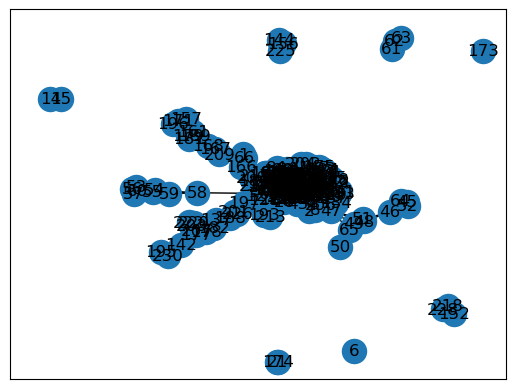

In [6]:
SS = convertTo_SSGraph(G)
ESVs = convertTo_ESVGraph(G)

print(SS.number_of_edges())
print(SS.number_of_nodes())

print(ESVs.number_of_edges())
print(ESVs.number_of_nodes())

nx.draw_networkx(SS)
nx.draw_networkx(ESVs)

# # Generate a new mapping for remaining nodes
new_mapping = {old_label: new_label for new_label, old_label in enumerate(ESVs.nodes())}
ESVs = nx.relabel_nodes(ESVs, new_mapping)

phase[6] z0, logL = -15617.976272364836


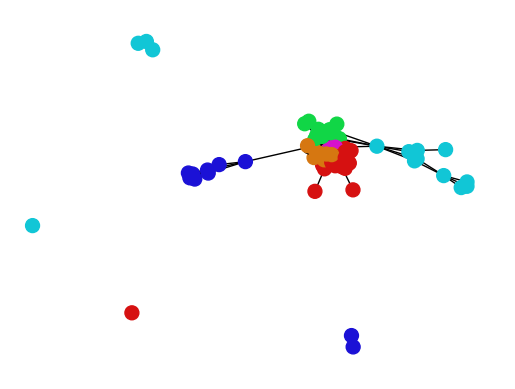

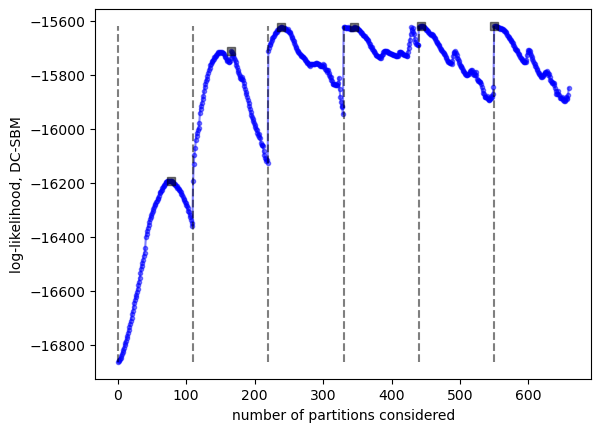

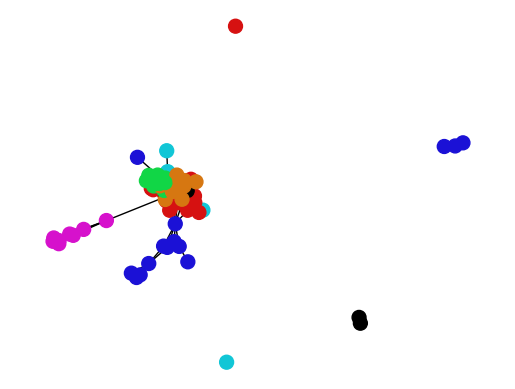

kappa_r = 
[584.  48. 252. 640.  41. 391. 238.]
w_rs = 
[[384.   0.  87.   0.   0. 110.   3.]
 [  0.  44.   0.   3.   0.   1.   0.]
 [ 87.   0.  82.   0.   0.  33.  50.]
 [  0.   3.   0. 384.   0. 151. 102.]
 [  0.   0.   0.   0.  40.   0.   1.]
 [110.   1.  33. 151.   0.  56.  40.]
 [  3.   0.  50. 102.   1.  40.  42.]]
Node: caa001ice, Location: FrozenIce, zstar label: 0
Node: caa002ice, Location: FrozenIce, zstar label: 0
Node: caa005ice, Location: FrozenIce, zstar label: 3
Node: caa010ice, Location: FrozenIce, zstar label: 0
Node: caa011cryo, Location: FrozenCryo, zstar label: 3
Node: caa012cryo, Location: FrozenCryo, zstar label: 2
Node: caa013ice, Location: FrozenIce, zstar label: 1
Node: caa017ice, Location: FrozenIce, zstar label: 0
Node: caa019cryo, Location: FrozenCryo, zstar label: 3
Node: caa020cryo, Location: FrozenCryo, zstar label: 3
Node: caa021cryo, Location: FrozenCryo, zstar label: 5
Node: caa025cryo, Location: FrozenCryo, zstar label: 3
Node: caa026cryo, Location: F

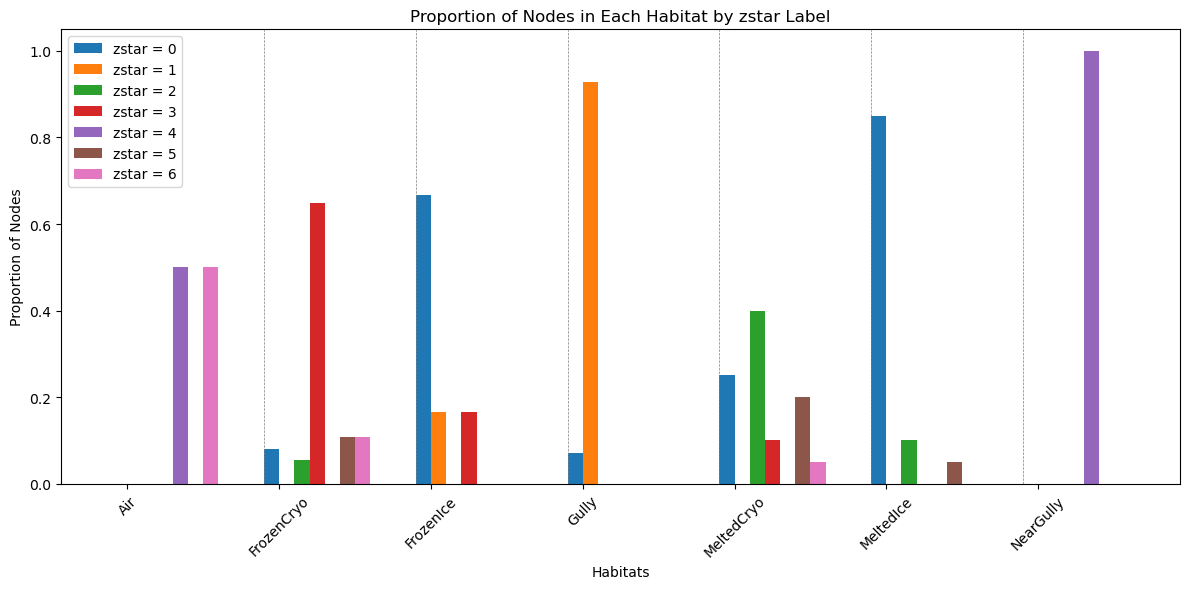

In [26]:
##### do not modify below here #####
##    run this code once you've written the fit_DCSBM() function

c    = 7       # c, number of groups
T    = 30      # maximum number of phases; HALT if pc >= T


# phototrophs = {}
# for node, data in ESVs.nodes(data=True):
#     if 'taxa' in data:
#         if data['taxa']['Phylum'] == 'Cyanobacteria': phototrophs[node] = 1
#         else: phototrophs[node] = 0
# tabulate_wk(ESVs,phototrophs,7)

#zstar,Lstar,LL,pc = fit_DCSBM(SS,c,T)

# visualize final partition, log-likelihood trajectory, and mixing matrix
print(f'phase[{pc}] z0, logL = {Lstar}')
# drawGz(ESVs,zstar)
colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc', '#000000'] # map node labels to colors (for the visualization)
node_colors = []
# node_to_remove = 108
# G.remove_node(node_to_remove)
for i in SS.nodes():
    node_colors.append(colors[int(zstar[i])])
nsize  = 600
flabel = True

if SS.order() > 50:
    nsize  = 100
    flabel = False
        
nx.draw_networkx(SS,with_labels=flabel,node_size=nsize,node_color=node_colors) # draw it pretty
limits=plt.axis('off')                                      # turn off axes
plt.show() 
plotLL(LL,pc,SS.order())

locations = {}
for node, data in SS.nodes(data=True):
    if 'location' in data:
        if data['location'] == 'FrozenCryo': locations[node] = 0
        elif data['location'] == 'FrozenIce': locations[node] = 1
        elif data['location'] == 'MeltedCryo': locations[node] = 2
        elif data['location'] == 'MeltedIce': locations[node] = 3
        elif data['location'] == 'Gully': locations[node] = 4
        elif data['location'] == 'NearGully': locations[node] = 5
        else: locations[node] = 6

drawGz(SS,locations)
tabulate_wk(SS,locations,7)

wrs,kpr = tabulate_wk(SS,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)


# Print node name, location name, and zstar label for each node
habitat = []
cluster = []
for i, data in SS.nodes(data=True):
    zstar_label = zstar[i]
    habitat.append(data['location'])
    cluster.append(zstar_label)
    print(f"Node: {data['name']}, Location: {data['location']}, zstar label: {zstar_label}")

    
# Count the number of occurrences of each habitat within each cluster
habitat_cluster_counts = {}
habitat_total_counts = {h: 0 for h in habitat}
for h, c in zip(habitat, cluster):
    habitat_total_counts[h] += 1
    if h not in habitat_cluster_counts:
        habitat_cluster_counts[h] = {}
    if c not in habitat_cluster_counts[h]:
        habitat_cluster_counts[h][c] = 0
    habitat_cluster_counts[h][c] += 1

# Calculate proportions of nodes with zstar labels 0 and 1 for each phylum
proportions = {}
for p in habitat_cluster_counts:
    total_nodes = habitat_total_counts[p]
    proportion_0 = habitat_cluster_counts[p].get(0, 0) / total_nodes
    proportion_1 = habitat_cluster_counts[p].get(1, 0) / total_nodes
    proportion_2 = habitat_cluster_counts[p].get(2, 0) / total_nodes
    proportion_3 = habitat_cluster_counts[p].get(3, 0) / total_nodes
    proportion_4 = habitat_cluster_counts[p].get(4, 0) / total_nodes
    proportion_5 = habitat_cluster_counts[p].get(5, 0) / total_nodes
    proportion_6 = habitat_cluster_counts[p].get(6, 0) / total_nodes
    proportions[p] = {'0': proportion_0, '1': proportion_1, '2': proportion_2, 
                     '3': proportion_3, '4': proportion_4, '5': proportion_5, 
                     '6': proportion_6}

# Prepare data for plotting
habitat_labels = sorted(proportions.keys())
bar_width = 0.1
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot bars for zstar label 0
bar_positions_0 = np.arange(len(habitat_labels))
bar_heights_0 = [proportions[p]['0'] for p in habitat_labels]
ax.bar(bar_positions_0, bar_heights_0, bar_width, label='zstar = 0')

# Plot bars for zstar label 1
bar_positions_1 = bar_positions_0 + bar_width
bar_heights_1 = [proportions[p]['1'] for p in habitat_labels]
ax.bar(bar_positions_1, bar_heights_1, bar_width, label='zstar = 1')

# Plot bars for zstar label 2
bar_positions_2 = bar_positions_1 + bar_width
bar_heights_2 = [proportions[p]['2'] for p in habitat_labels]
ax.bar(bar_positions_2, bar_heights_2, bar_width, label='zstar = 2')

# Plot bars for zstar label 3
bar_positions_3 = bar_positions_2 + bar_width
bar_heights_3 = [proportions[p]['3'] for p in habitat_labels]
ax.bar(bar_positions_3, bar_heights_3, bar_width, label='zstar = 3')

# Plot bars for zstar label 4
bar_positions_4 = bar_positions_3 + bar_width
bar_heights_4 = [proportions[p]['4'] for p in habitat_labels]
ax.bar(bar_positions_4, bar_heights_4, bar_width, label='zstar = 4')

# Plot bars for zstar label 5
bar_positions_5 = bar_positions_4 + bar_width
bar_heights_5 = [proportions[p]['5'] for p in habitat_labels]
ax.bar(bar_positions_5, bar_heights_5, bar_width, label='zstar = 5')

# Plot bars for zstar label 6
bar_positions_6 = bar_positions_5 + bar_width
bar_heights_6 = [proportions[p]['6'] for p in habitat_labels]
ax.bar(bar_positions_6, bar_heights_6, bar_width, label='zstar = 6')

# Add vertical dotted lines to separate x-axis labels
for i in range(len(habitat_labels) - 1):
    ax.axvline(x=(i + 1) - 0.05, color='gray', linestyle='--', linewidth=0.5)

# Add labels, titles, and legend
ax.set_xlabel('Habitats')
ax.set_ylabel('Proportion of Nodes')
ax.set_title('Proportion of Nodes in Each Habitat by zstar Label')
ax.set_xticks(bar_positions_0 + bar_width / 2)
ax.set_xticklabels(habitat_labels)
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 --> WE HAVE CONVERGENCE <-- 
phase[4] z0, logL = -16845.752911396645


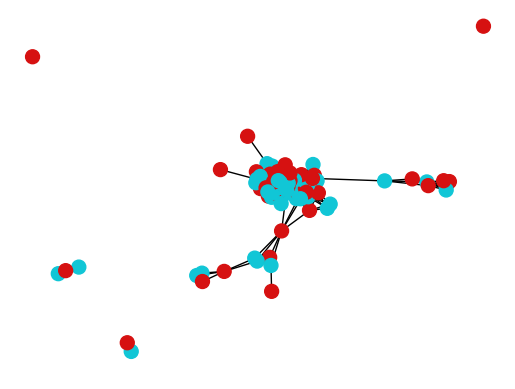

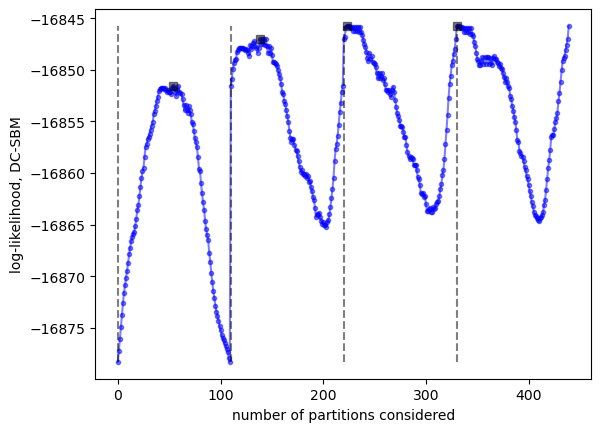

kappa_r = 
[1030. 1164.]
w_rs = 
[[388. 642.]
 [642. 522.]]
Node: caa001ice, Location: FrozenIce, zstar label: 1
Node: caa002ice, Location: FrozenIce, zstar label: 0
Node: caa005ice, Location: FrozenIce, zstar label: 1
Node: caa010ice, Location: FrozenIce, zstar label: 1
Node: caa011cryo, Location: FrozenCryo, zstar label: 0
Node: caa012cryo, Location: FrozenCryo, zstar label: 1
Node: caa013ice, Location: FrozenIce, zstar label: 0
Node: caa017ice, Location: FrozenIce, zstar label: 1
Node: caa019cryo, Location: FrozenCryo, zstar label: 1
Node: caa020cryo, Location: FrozenCryo, zstar label: 1
Node: caa021cryo, Location: FrozenCryo, zstar label: 1
Node: caa025cryo, Location: FrozenCryo, zstar label: 1
Node: caa026cryo, Location: FrozenCryo, zstar label: 0
Node: caa029cryo, Location: FrozenCryo, zstar label: 1
Node: TVASC1, Location: Air, zstar label: 1
Node: TVASE1, Location: Air, zstar label: 0
Node: CAN23, Location: FrozenCryo, zstar label: 1
Node: CAN24, Location: FrozenCryo, zstar lab

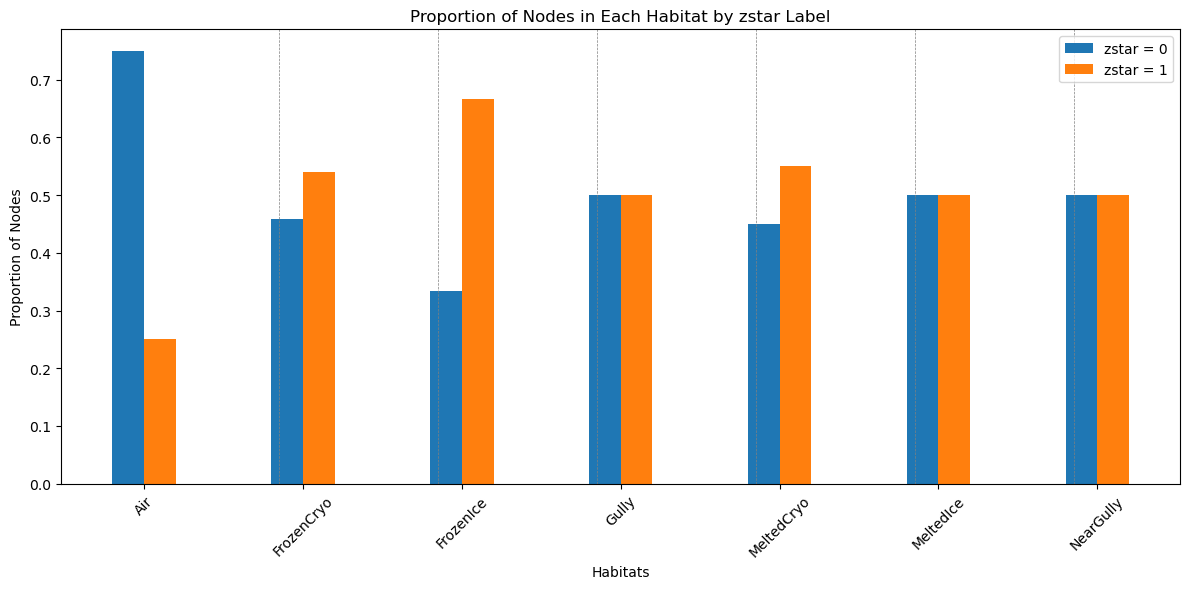

In [27]:
##### do not modify below here #####
##    run this code once you've written the fit_DCSBM() function

c    = 2       # c, number of groups
T    = 30      # maximum number of phases; HALT if pc >= T

zstar,Lstar,LL,pc = fit_DCSBM(SS,c,T)

# visualize final partition, log-likelihood trajectory, and mixing matrix
print(f'phase[{pc}] z0, logL = {Lstar}')
# drawGz(ESVs,zstar)
colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc', '#000000'] # map node labels to colors (for the visualization)
node_colors = []
# node_to_remove = 108
# G.remove_node(node_to_remove)
for i in SS.nodes():
    node_colors.append(colors[int(zstar[i])])
nsize  = 600
flabel = True

if SS.order() > 50:
    nsize  = 100
    flabel = False
        
nx.draw_networkx(SS,with_labels=flabel,node_size=nsize,node_color=node_colors) # draw it pretty
limits=plt.axis('off')                                      # turn off axes
plt.show() 
plotLL(LL,pc,SS.order())

wrs,kpr = tabulate_wk(SS,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)


# Print node name, location name, and zstar label for each node
habitat = []
cluster = []
for i, data in SS.nodes(data=True):
    zstar_label = zstar[i]
    habitat.append(data['location'])
    cluster.append(zstar_label)
    print(f"Node: {data['name']}, Location: {data['location']}, zstar label: {zstar_label}")

    
# Count the number of occurrences of each habitat within each cluster
habitat_cluster_counts = {}
habitat_total_counts = {h: 0 for h in habitat}
for h, c in zip(habitat, cluster):
    habitat_total_counts[h] += 1
    if h not in habitat_cluster_counts:
        habitat_cluster_counts[h] = {}
    if c not in habitat_cluster_counts[h]:
        habitat_cluster_counts[h][c] = 0
    habitat_cluster_counts[h][c] += 1

# Calculate proportions of nodes with zstar labels 0 and 1 for each phylum
proportions = {}
for p in habitat_cluster_counts:
    total_nodes = habitat_total_counts[p]
    proportion_0 = habitat_cluster_counts[p].get(0, 0) / total_nodes
    proportion_1 = habitat_cluster_counts[p].get(1, 0) / total_nodes
    proportion_2 = habitat_cluster_counts[p].get(2, 0) / total_nodes
    proportion_3 = habitat_cluster_counts[p].get(3, 0) / total_nodes
    proportion_4 = habitat_cluster_counts[p].get(4, 0) / total_nodes
    proportion_5 = habitat_cluster_counts[p].get(5, 0) / total_nodes
    proportion_6 = habitat_cluster_counts[p].get(6, 0) / total_nodes
    proportions[p] = {'0': proportion_0, '1': proportion_1, '2': proportion_2, 
                     '3': proportion_3, '4': proportion_4, '5': proportion_5, 
                     '6': proportion_6}

# Prepare data for plotting
habitat_labels = sorted(proportions.keys())
bar_width = 0.2
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for zstar label 0
bar_positions_0 = np.arange(len(habitat_labels))
bar_heights_0 = [proportions[p]['0'] for p in habitat_labels]
ax.bar(bar_positions_0, bar_heights_0, bar_width, label='zstar = 0')

# Plot bars for zstar label 1
bar_positions_1 = bar_positions_0 + bar_width
bar_heights_1 = [proportions[p]['1'] for p in habitat_labels]
ax.bar(bar_positions_1, bar_heights_1, bar_width, label='zstar = 1')

# # Plot bars for zstar label 2
# bar_positions_2 = bar_positions_1 + bar_width
# bar_heights_2 = [proportions[p]['2'] for p in habitat_labels]
# ax.bar(bar_positions_2, bar_heights_2, bar_width, label='zstar = 2')

# # Plot bars for zstar label 3
# bar_positions_3 = bar_positions_2 + bar_width
# bar_heights_3 = [proportions[p]['3'] for p in habitat_labels]
# ax.bar(bar_positions_3, bar_heights_3, bar_width, label='zstar = 3')

# # Plot bars for zstar label 4
# bar_positions_4 = bar_positions_3 + bar_width
# bar_heights_4 = [proportions[p]['4'] for p in habitat_labels]
# ax.bar(bar_positions_4, bar_heights_4, bar_width, label='zstar = 4')

# # Plot bars for zstar label 5
# bar_positions_5 = bar_positions_4 + bar_width
# bar_heights_5 = [proportions[p]['5'] for p in habitat_labels]
# ax.bar(bar_positions_5, bar_heights_5, bar_width, label='zstar = 5')

# # Plot bars for zstar label 6
# bar_positions_6 = bar_positions_5 + bar_width
# bar_heights_6 = [proportions[p]['6'] for p in habitat_labels]
# ax.bar(bar_positions_6, bar_heights_6, bar_width, label='zstar = 6')

# # Plot bars for each zstar label
# for i in range(2):
#     bar_positions = np.arange(len(habitat_labels)) + i * bar_width
#     bar_heights = [proportions[p][str(i)] for p in habitat_labels]
#     ax.bar(bar_positions, bar_heights, bar_width, label=f'zstar = {i}')

# Add vertical dotted lines to separate x-axis labels
for i in range(len(habitat_labels) - 1):
    ax.axvline(x=(i + 1) - 0.05, color='gray', linestyle='--', linewidth=0.5)

# Add labels, titles, and legend
ax.set_xlabel('Habitats')
ax.set_ylabel('Proportion of Nodes')
ax.set_title('Proportion of Nodes in Each Habitat by zstar Label')
ax.set_xticks(bar_positions_0 + bar_width / 2)
ax.set_xticklabels(habitat_labels)
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# # Calculate proportions
# proportions = {}
# for c in clusters:
#     proportions[c] = [habitat_cluster_counts[c].get(h, 0) / habitat_total_counts[h] for h in habitats]

# # Prepare data for plotting
# habitat_indices = np.arange(len(habitats))
# bar_width = 0.1
# fig, ax = plt.subplots(figsize=(10, 6))
# for i, c in enumerate(clusters):
#     ax.bar([x + i * bar_width for x in habitat_indices], proportions[c], bar_width, label=f'Cluster {c}')

# ax.set_xlabel('Habitat')
# ax.set_ylabel('Proportion of Total in Habitat')
# ax.set_title('Habitat Distribution Across Clusters (Normalized)')
# ax.set_xticks([x + bar_width for x in habitat_indices])
# ax.set_xticklabels(habitats)
# ax.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


 --> WE HAVE CONVERGENCE <-- 
phase[3] z0, logL = -7907.134444104337


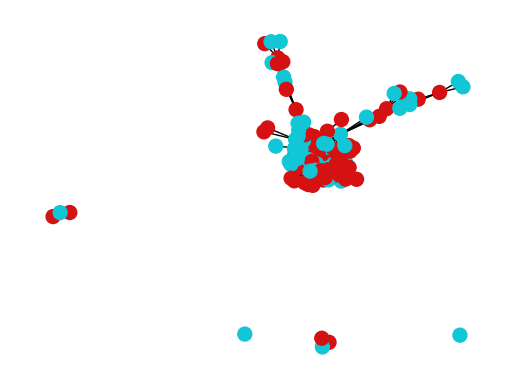

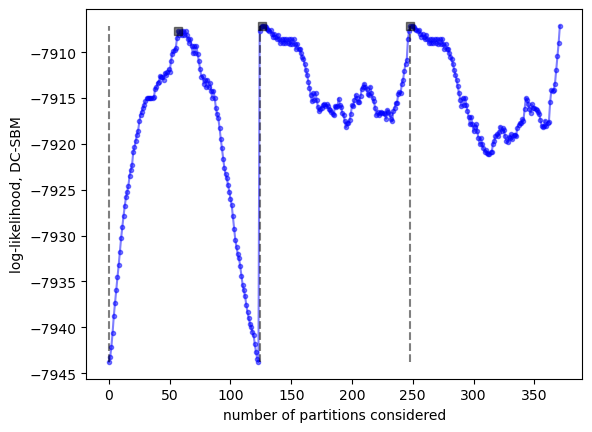

kappa_r = 
[663. 467.]
w_rs = 
[[320. 343.]
 [343. 124.]]
[ 0  1  2  3  4  5  6  7  8  9 10]
[0.8333333333333334, 0.5555555555555556, 0.5833333333333334, 0.0, 0.6666666666666666, 0.0, 0.3333333333333333, 1.0, 1.0, 0.3125, 0.5]


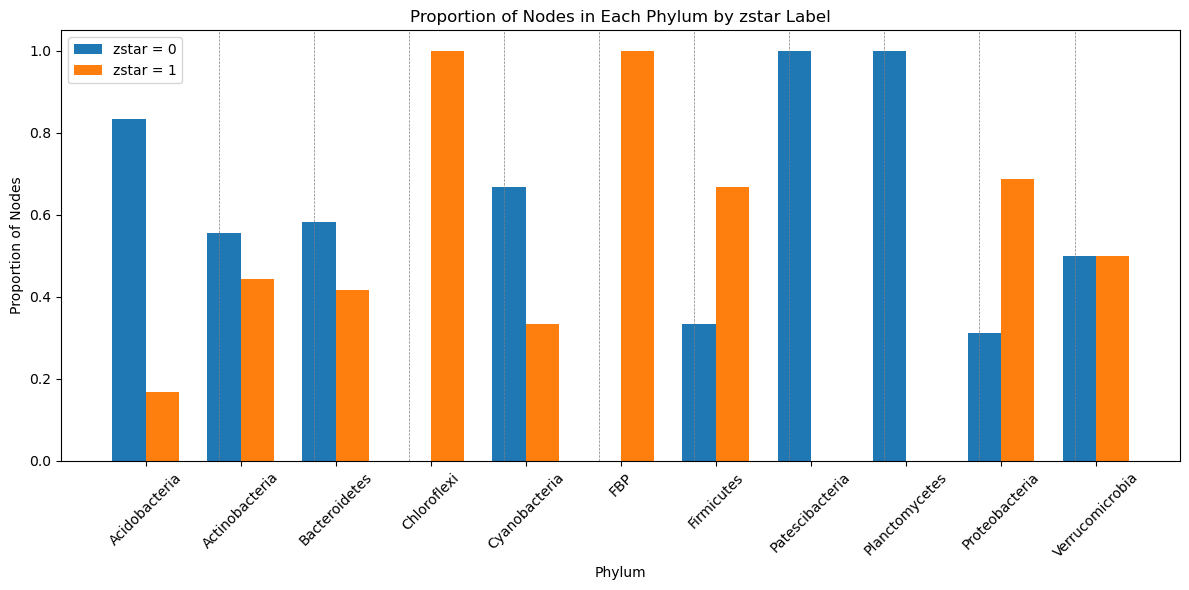

In [9]:
##### do not modify below here #####
##    run this code once you've written the fit_DCSBM() function

c    = 2       # c, number of groups
T    = 30      # maximum number of phases; HALT if pc >= T

zstar,Lstar,LL,pc = fit_DCSBM(ESVs,c,T)

# visualize final partition, log-likelihood trajectory, and mixing matrix
print(f'phase[{pc}] z0, logL = {Lstar}')
# drawGz(ESVs,zstar)
colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc', '#000000'] # map node labels to colors (for the visualization)
node_colors = []
for i in ESVs.nodes():
    node_colors.append(colors[int(zstar[i])])
nsize  = 600
flabel = True

if ESVs.order() > 50:
    nsize  = 100
    flabel = False
        
nx.draw_networkx(ESVs,with_labels=flabel,node_size=nsize,node_color=node_colors) # draw it pretty
limits=plt.axis('off')                                      # turn off axes
plt.show() 
plotLL(LL,pc,ESVs.order())

wrs,kpr = tabulate_wk(ESVs,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)

phylum = []
cluster = []
for i, data in ESVs.nodes(data=True):
    zstar_label = zstar[i]
    phylum.append(data['taxa']['Phylum'])
    cluster.append(zstar_label)

# Count the number of occurrences of each phylum within each cluster
phylum_cluster_counts = {}
phylum_total_counts = {p: 0 for p in phylum}
for p, c in zip(phylum, cluster):
    phylum_total_counts[p] += 1
    if p not in phylum_cluster_counts:
        phylum_cluster_counts[p] = {0: 0, 1: 0}
    phylum_cluster_counts[p][c] += 1
#     if c not in phylum_cluster_counts:
#         phylum_cluster_counts[c] = {}
#     if p not in phylum_cluster_counts[c]:
#         phylum_cluster_counts[c][p] = 0
#     phylum_cluster_counts[c][p] += 1

# # Calculate proportions
# proportions = {}
# for p in phylum_cluster_counts:
#     total_nodes = phylum_total_counts[p]
#     proporitions[p] = {'0': phylum_total_counts[p][0] / total_nodes, '1': phylum_total_counts[p][1]/total_nodes}
# # for c in clusters:
# #     proportions[c] = [phylum_cluster_counts[c].get(p, 0) / phylum_total_counts[p] for p in phylum]

# Calculate proportions of nodes with zstar labels 0 and 1 for each phylum
proportions = {}
for p in phylum_cluster_counts:
    total_nodes = phylum_total_counts[p]
    proportion_0 = phylum_cluster_counts[p].get(0, 0) / total_nodes
    proportion_1 = phylum_cluster_counts[p].get(1, 0) / total_nodes
    proportions[p] = {'0': proportion_0, '1': proportion_1}

# # Prepare data for plotting
# phylum_indices = len(np.unique(phylum))
# bar_width = 0.1
# fig, ax = plt.subplots(figsize=(10, 6))
# for i, c in enumerate(clusters):
#     ax.bar([x + i * bar_width for x in phylum_indices], proportions[c], bar_width, label=f'Cluster {c}')

# ax.set_xlabel('Phylum')
# ax.set_ylabel('Proportion of Total in Phylum')
# ax.set_title('Phylum Distribution Across Clusters (Normalized)')
# ax.set_xticks([x + bar_width for x in phylum_indices])
# ax.set_xticklabels(np.unique(phylum))
# ax.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Prepare data for plotting
phylum_labels = sorted(proportions.keys())
bar_width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for zstar label 0
bar_positions_0 = np.arange(len(phylum_labels))
bar_heights_0 = [proportions[p]['0'] for p in phylum_labels]
print(bar_positions_0)
print(bar_heights_0)
ax.bar(bar_positions_0, bar_heights_0, bar_width, label='zstar = 0')

# Plot bars for zstar label 1
bar_positions_1 = bar_positions_0 + bar_width
bar_heights_1 = [proportions[p]['1'] for p in phylum_labels]
ax.bar(bar_positions_1, bar_heights_1, bar_width, label='zstar = 1')

# # Plot bars for each zstar label
# for i in range(2):
#     bar_positions = np.arange(len(phylum_labels)) + i * bar_width
#     bar_heights = [proportions[p][str(i)] for p in phylum_labels]
#     ax.bar(bar_positions, bar_heights, bar_width, label=f'zstar = {i}')

# Add vertical dotted lines to separate x-axis labels
for i in range(len(phylum_labels) - 1):
    ax.axvline(x=(i + 1) - 0.05, color='gray', linestyle='--', linewidth=0.5)

# Add labels, titles, and legend
ax.set_xlabel('Phylum')
ax.set_ylabel('Proportion of Nodes')
ax.set_title('Proportion of Nodes in Each Phylum by zstar Label')
ax.set_xticks(bar_positions_0 + bar_width / 2)
ax.set_xticklabels(phylum_labels)
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
locations = {}
for node, data in SS.nodes(data=True):
    if 'location' in data:
        if data['location'] == 'FrozenCryo': locations[node] = 0
        elif data['location'] == 'FrozenIce': locations[node] = 1
        elif data['location'] == 'MeltedCryo': locations[node] = 2
        elif data['location'] == 'MeltedIce': locations[node] = 3
        elif data['location'] == 'Gully': locations[node] = 4
        elif data['location'] == 'NearGully': locations[node] = 5
        else: locations[node] = 6

#drawGz(SS,locations)
wrs, kpr = tabulate_wk(SS,locations,7)

print(dcsbm_LogL(wrs,kpr))
print("kappa_r = ", kpr)
print("w_rs = ", wrs)

phototrophs = {}
for node, data in ESVs.nodes(data=True):
    if 'taxa' in data:
        if data['taxa']['Phylum'] == 'Cyanobacteria': phototrophs[node] = 1
        else: phototrophs[node] = 0

            
wrs, kpr = tabulate_wk(ESVs,phototrophs,2)
print(dcsbm_LogL(wrs,kpr))
print("kappa_r = ", kpr)
print("w_rs = ", wrs)

-16169.013594321403
kappa_r =  [963.  52. 542. 502.  49.  39.  47.]
w_rs =  [[648.   7. 205.  72.   3.   0.  28.]
 [  7.   8.  13.  24.   0.   0.   0.]
 [205.  13. 196. 117.   1.   0.  10.]
 [ 72.  24. 117. 284.   1.   0.   4.]
 [  3.   0.   1.   1.  44.   0.   0.]
 [  0.   0.   0.   0.   0.  38.   1.]
 [ 28.   0.  10.   4.   0.   1.   4.]]
-7934.245203074736
kappa_r =  [930. 200.]
w_rs =  [[788. 142.]
 [142.  58.]]


 --> WE HAVE CONVERGENCE <-- 
phase[6] z0, logL = -6962.906701856624


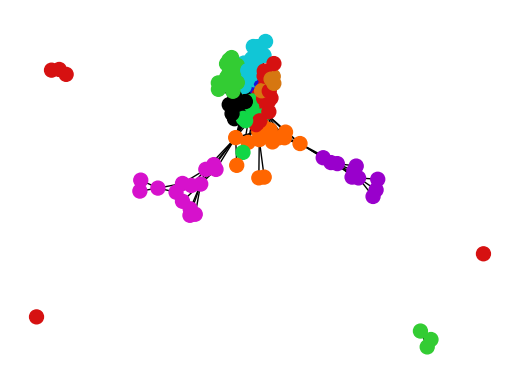

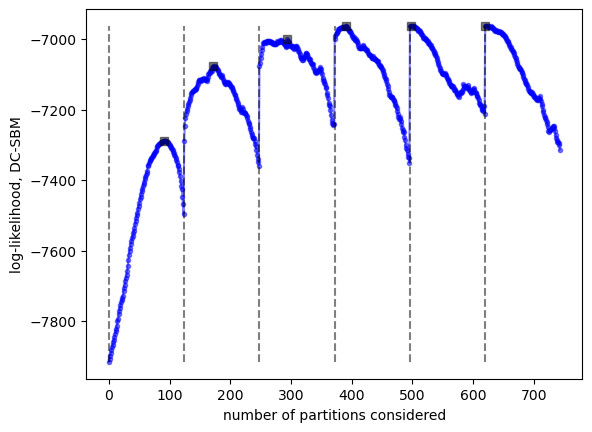

kappa_r = 
[118. 135.  33. 176. 184.  54. 128. 118. 145.  39.]
w_rs = 
[[52.  1.  0. 33. 30.  0.  2.  0.  0.  0.]
 [ 1. 62.  0.  3. 53.  0. 11.  0.  5.  0.]
 [ 0.  0. 20.  2. 10.  0.  0.  0.  1.  0.]
 [33.  3.  2. 54. 26.  0. 26. 29.  3.  0.]
 [30. 53. 10. 26. 28.  0. 11.  2. 24.  0.]
 [ 0.  0.  0.  0.  0. 50.  0.  4.  0.  0.]
 [ 2. 11.  0. 26. 11.  0. 52.  6. 20.  0.]
 [ 0.  0.  0. 29.  2.  4.  6. 74.  0.  3.]
 [ 0.  5.  1.  3. 24.  0. 20.  0. 92.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.  0. 36.]]


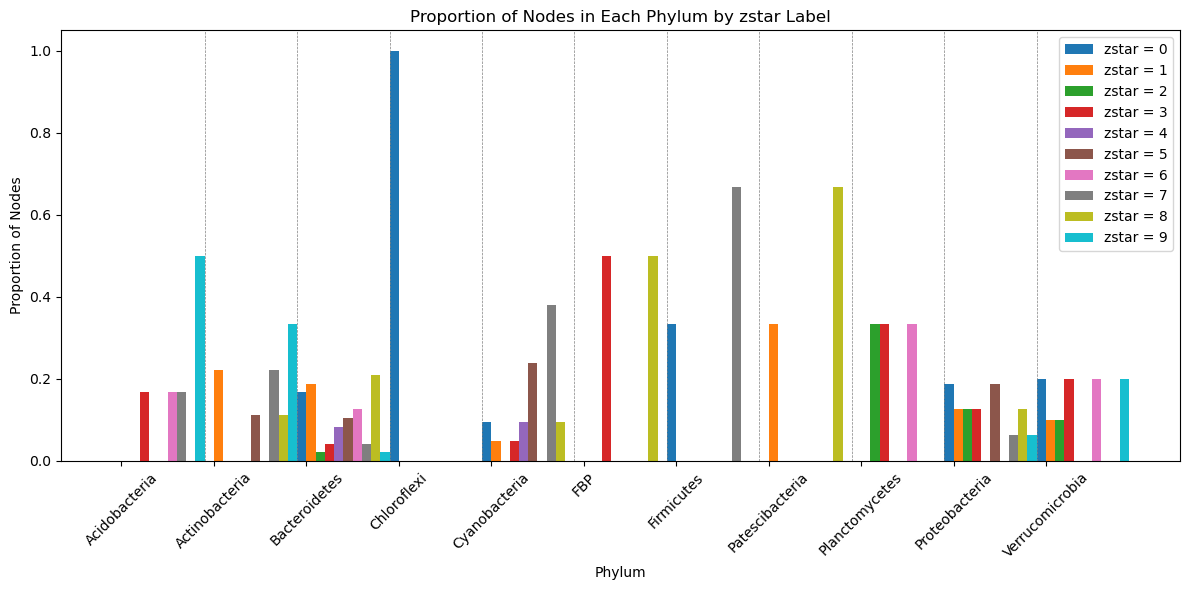

In [11]:
##### do not modify below here #####
##    run this code once you've written the fit_DCSBM() function

c    = 10       # c, number of groups
T    = 30      # maximum number of phases; HALT if pc >= T

zstar,Lstar,LL,pc = fit_DCSBM(ESVs,c,T)

# visualize final partition, log-likelihood trajectory, and mixing matrix
print(f'phase[{pc}] z0, logL = {Lstar}')
# drawGz(ESVs,zstar)
colors = ['#d61111', '#11c6d6', '#d67711', '#11d646', '#1b11d6', '#d611cc', '#000000', '#ff6600', '#33cc33', '#9900cc']
node_colors = []
for i in ESVs.nodes():
    node_colors.append(colors[int(zstar[i])])
nsize  = 600
flabel = True

if ESVs.order() > 50:
    nsize  = 100
    flabel = False
        
nx.draw_networkx(ESVs,with_labels=flabel,node_size=nsize,node_color=node_colors) # draw it pretty
limits=plt.axis('off')                                      # turn off axes
plt.show() 
plotLL(LL,pc,ESVs.order())

wrs,kpr = tabulate_wk(ESVs,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)

phylum = []
cluster = []
for i, data in ESVs.nodes(data=True):
    zstar_label = zstar[i]
    phylum.append(data['taxa']['Phylum'])
    cluster.append(zstar_label)

# Count the number of occurrences of each phylum within each cluster
phylum_cluster_counts = {}
phylum_total_counts = {p: 0 for p in phylum}
for p, c in zip(phylum, cluster):
    phylum_total_counts[p] += 1
    if p not in phylum_cluster_counts:
        phylum_cluster_counts[p] = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
    phylum_cluster_counts[p][c] += 1
    
proportions = {}
for p in phylum_cluster_counts:
    total_nodes = phylum_total_counts[p]
    proportion_0 = phylum_cluster_counts[p].get(0, 0) / total_nodes
    proportion_1 = phylum_cluster_counts[p].get(1, 0) / total_nodes
    proportion_2 = phylum_cluster_counts[p].get(2, 0) / total_nodes
    proportion_3 = phylum_cluster_counts[p].get(3, 0) / total_nodes
    proportion_4 = phylum_cluster_counts[p].get(4, 0) / total_nodes
    proportion_5 = phylum_cluster_counts[p].get(5, 0) / total_nodes
    proportion_6 = phylum_cluster_counts[p].get(6, 0) / total_nodes
    proportion_7 = phylum_cluster_counts[p].get(7, 0) / total_nodes
    proportion_8 = phylum_cluster_counts[p].get(8, 0) / total_nodes
    proportion_9 = phylum_cluster_counts[p].get(9, 0) / total_nodes
    proportions[p] = {'0': proportion_0, '1': proportion_1, '2': proportion_2, 
                     '3': proportion_3, '4': proportion_4, '5': proportion_5, 
                     '6': proportion_6, '7': proportion_7, '8': proportion_8,
                     '9': proportion_9}

# # Prepare data for plotting
# phylum_indices = len(np.unique(phylum))
# bar_width = 0.1
# fig, ax = plt.subplots(figsize=(10, 6))
# for i, c in enumerate(clusters):
#     ax.bar([x + i * bar_width for x in phylum_indices], proportions[c], bar_width, label=f'Cluster {c}')

# ax.set_xlabel('Phylum')
# ax.set_ylabel('Proportion of Total in Phylum')
# ax.set_title('Phylum Distribution Across Clusters (Normalized)')
# ax.set_xticks([x + bar_width for x in phylum_indices])
# ax.set_xticklabels(np.unique(phylum))
# ax.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Prepare data for plotting
phylum_labels = sorted(proportions.keys())
bar_width = 0.1
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for zstar label 0
bar_positions_0 = np.arange(len(phylum_labels))
bar_heights_0 = [proportions[p]['0'] for p in phylum_labels]
ax.bar(bar_positions_0, bar_heights_0, bar_width, label='zstar = 0')

# Plot bars for zstar label 1
bar_positions_1 = bar_positions_0 + bar_width
bar_heights_1 = [proportions[p]['1'] for p in phylum_labels]
ax.bar(bar_positions_1, bar_heights_1, bar_width, label='zstar = 1')

# Plot bars for zstar label 2
bar_positions_2 = bar_positions_1 + bar_width
bar_heights_2 = [proportions[p]['2'] for p in phylum_labels]
ax.bar(bar_positions_2, bar_heights_2, bar_width, label='zstar = 2')

# Plot bars for zstar label 3
bar_positions_3 = bar_positions_2 + bar_width
bar_heights_3 = [proportions[p]['3'] for p in phylum_labels]
ax.bar(bar_positions_3, bar_heights_3, bar_width, label='zstar = 3')

# Plot bars for zstar label 4
bar_positions_4 = bar_positions_3 + bar_width
bar_heights_4 = [proportions[p]['4'] for p in phylum_labels]
ax.bar(bar_positions_4, bar_heights_4, bar_width, label='zstar = 4')

# Plot bars for zstar label 5
bar_positions_5 = bar_positions_4 + bar_width
bar_heights_5 = [proportions[p]['5'] for p in phylum_labels]
ax.bar(bar_positions_5, bar_heights_5, bar_width, label='zstar = 5')

# Plot bars for zstar label 6
bar_positions_6 = bar_positions_5 + bar_width
bar_heights_6 = [proportions[p]['6'] for p in phylum_labels]
ax.bar(bar_positions_6, bar_heights_6, bar_width, label='zstar = 6')

# Plot bars for zstar label 7
bar_positions_7 = bar_positions_6 + bar_width
bar_heights_7 = [proportions[p]['7'] for p in phylum_labels]
ax.bar(bar_positions_7, bar_heights_7, bar_width, label='zstar = 7')

# Plot bars for zstar label 8
bar_positions_8 = bar_positions_7 + bar_width
bar_heights_8 = [proportions[p]['8'] for p in phylum_labels]
ax.bar(bar_positions_8, bar_heights_8, bar_width, label='zstar = 8')

# Plot bars for zstar label 9
bar_positions_9 = bar_positions_8 + bar_width
bar_heights_9 = [proportions[p]['9'] for p in phylum_labels]
ax.bar(bar_positions_9, bar_heights_9, bar_width, label='zstar = 9')

# # Plot bars for each zstar label
# for i in range(10):
#     bar_positions = np.arange(len(phylum_labels)) + i * bar_width
#     bar_heights = [proportions[p][str(i)] for p in phylum_labels]
#     ax.bar(bar_positions, bar_heights, bar_width, label=f'zstar = {i}')

# Add vertical dotted lines to separate x-axis labels
for i in range(len(phylum_labels) - 1):
    ax.axvline(x=(i + 1) - 0.05, color='gray', linestyle='--', linewidth=0.5)

# Add labels, titles, and legend
ax.set_xlabel('Phylum')
ax.set_ylabel('Proportion of Nodes')
ax.set_title('Proportion of Nodes in Each Phylum by zstar Label')
ax.set_xticks(bar_positions_0 + bar_width / 2)
ax.set_xticklabels(phylum_labels)
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()